Many of the ***core facilities*** that you need when programming are provided ***not by the C# language*** but by `types in the .NET BCL`.

### Char

A C# ***char*** represents a `single Unicode character` and aliases the `System.Char` ***struct***.

In [ ]:
char c = 'A';
char newLine = '\n';

`ToUpper` and `ToLower` honor the end `user’s locale`, which can `lead` to subtle `bugs`.

In [ ]:
using System.Globalization;

Console.WriteLine(char.ToUpper ('i') == 'I'); //evaluates to false in Turkey

//in Turkey, char.ToUpper ('i') is 'İ'

//To avoid this problem, also provides culture-invariant 
//versions of ToUpper and ToLower ending with the word Invariant

//These always apply English culture rules
Console.WriteLine (char.ToUpperInvariant ('i')); // I

//This is a shortcut for:
Console.WriteLine (char.ToUpper ('i', CultureInfo.InvariantCulture))


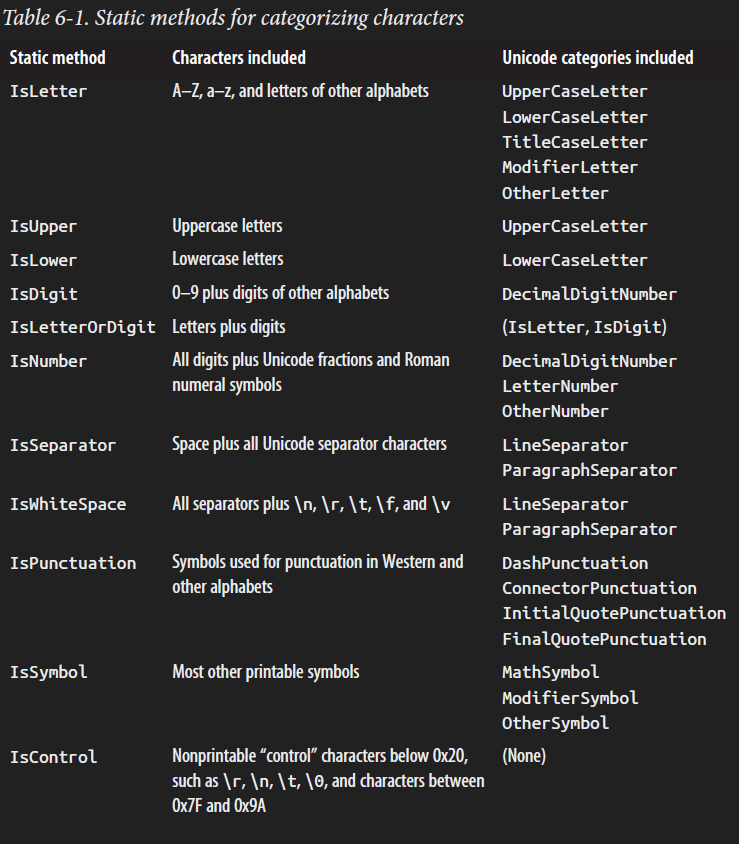

punctuation : علامت‌های نگارشی شامل کاراکترهایی مانند نقطه، کاما، علامت سوال، علامت تعجب و غیره هستند.

control character: شامل کاراکترهایی مانند   
`backspace`، `tab`، `line feed`، `carriage return`   
و غیره می‌شوند.

In [ ]:
char character1 = '\b'; // Backspace
char character2 = 'a';
char character3 = '\n'; // Newline

bool isControl1 = Char.IsControl(character1);
bool isControl2 = Char.IsControl(character2);
bool isControl3 = Char.IsControl(character3);

Console.WriteLine($"{(int)character1} is control: {isControl1}"); // Output: 8 is control: True
Console.WriteLine($"{(int)character2} is control: {isControl2}"); // Output: 97 is control: False
Console.WriteLine($"{(int)character3} is control: {isControl3}"); // Output: 10 is control: True

A ***char*** is `16 bits` wide—enough to represent any Unicode character in the `Basic Multilingual Plane (BMP)`.

### String

A ***C#*** `string` (== System.String) is an **immutable** (unchangeable) sequence of characters.

##### Constructing strings

In [ ]:
//The simplest way to construct a string is to assign a literal

string s1 = "Hello";
string s2 = "First Line\r\nSecond Line";
string s3 = @"\\server\fileshare\helloworld.cs";

//To create a repeating sequence of characters, you can use string’s constructor:
Console.Write (new string ('*', 10)); // **********

//You can also construct a string from a char array.
char[] ca = "Hello".ToCharArray();
string s = new string (ca);

##### Null and empty strings

An ***empty string*** has a length of `zero`.

In [ ]:
string empty = "";
Console.WriteLine (empty == ""); // True
Console.WriteLine (empty == string.Empty); // True
Console.WriteLine (empty.Length == 0); // True

//Because strings are reference types, they can also be null:
string nullString = null;
Console.WriteLine (nullString == null); // True
Console.WriteLine (nullString == ""); // False
Console.WriteLine (nullString.Length == 0); // NullReferenceException

//Accessing characters within a string
string str = "abcde";
char letter = str[1]; // letter == 'b'

//string also implements IEnumerable<char>
foreach (char c in "123") Console.Write (c + ","); // 1,2,3,

### Searching within strings

The simplest methods for ***searching*** within strings are `StartsWith`, `EndsWith`, and `Contains`.  
**StartsWith** and **EndsWith** are overloaded to let you specify a `StringComparison` enum or a `CultureInfo` object to control `case` and `culture` sensitivity

In [ ]:
"abcdef".StartsWith ("aBc", StringComparison.InvariantCultureIgnoreCase)
//InvariantCulture for dont use local calture 
//IgnoreCase for dont sensitive 

In [ ]:
//IndexOf is more powerful: it returns the first position of a given character or
//substring
Console.WriteLine ("abcde".IndexOf ("cd")); // 2

//IndexOf is also overloaded to accept a startPosition 
// as well as a StringComparison enum
Console.WriteLine ("abcde abcde".IndexOf ("CD", 6,
StringComparison.CurrentCultureIgnoreCase)); // 8

//LastIndexOf is like IndexOf, but it works backward through the string.

//IndexOfAny returns the first matching position of any one of a set of characters:
Console.Write ("ab,cd ef".IndexOfAny (new char[] {' ', ','} )); // 2
Console.Write ("pas5w0rd".IndexOfAny ("0123456789".ToCharArray() )); // 3

//LastIndexOfAny does the same in the reverse direction.



### Manipulating strings

Because ***String*** is `immutable`, all the methods that `manipulate` a string return a `new one`, leaving the `original untouched`

In [ ]:
//Substring extracts a portion of a string:
string left3 = "12345".Substring (0, 3); // left3 = "123";
string mid3 = "12345".Substring (1, 3); // mid3 = "234";

//If you omit the length, you get the remainder of the string:
string end3 = "12345".Substring (2); // end3 = "345";

//Insert and Remove insert or remove characters at a specified position:
string s1 = "helloworld".Insert (5, ", "); // s1 = "hello, world"
string s2 = s1.Remove (5, 2); // s2 = "helloworld";

//PadLeft and PadRight pad a string to a given length with a specified character
Console.WriteLine ("12345".PadLeft (9, '*')); // ****12345
Console.WriteLine ("12345".PadLeft (9));      //     12345
//If the input string is longer than the padding length, 
//the original string is returned unchanged.

`TrimStart` and `TrimEnd` remove specified characters from the beginning or end of
a string; `Trim` does both. By default, these functions remove ***whitespace characters*** (including `spaces`, `tabs`, `new lines`, and `Unicode variations of these`):

In [ ]:
Console.WriteLine (" abc \t\r\n ".Trim().Length); // 3

//Replace replaces all (nonoverlapping) occurrences of a particular character or substring
Console.WriteLine ("to be done".Replace (" ", " | ") ); // to | be | done
Console.WriteLine ("to be done".Replace (" ", "") ); // tobedone

`ToUpper` and `ToLower` return uppercase and lowercase versions of the input string.
By default, they honor the `user’s current language settings`; `ToUpperInvariant` and
`ToLowerInvariant` always apply English alphabet rules.

### Splitting and joining strings

In [ ]:
//Split divides a string into pieces:
string[] words = "The quick brown fox".Split();

**By default**, ***Split*** uses `whitespace characters` as delimiters; it’s also overloaded to accept a `params array of char` or `string delimiters`. Split also optionally accepts a `StringSplitOptions` enum, which has an option to remove empty entries: this is useful when words are separated by several delimiters in a row

In [ ]:
// Example 1: Default behavior using whitespace as delimiter
        string text1 = "This is a sample text";
        string[] words1 = text1.Split();
        Console.WriteLine("Example 1: Default split by whitespace");
        foreach (string word in words1)
        {
            Console.WriteLine(word);
        }

        // Example 2: Split using an array of char delimiters
        string text2 = "apple,banana;cherry|date";
        char[] delimiters = new char[] { ',', ';', '|' };
        string[] words2 = text2.Split(delimiters);
        Console.WriteLine("\nExample 2: Split by char delimiters (, ; |)");
        foreach (string word in words2)
        {
            Console.WriteLine(word);
        }

        // Example 3: Split using a string delimiter
        string text3 = "one--two--three--four";
        string[] stringDelimiters = new string[] { "--" };
        string[] words3 = text3.Split(stringDelimiters, StringSplitOptions.None);
        Console.WriteLine("\nExample 3: Split by string delimiter (--)");
        foreach (string word in words3)
        {
            Console.WriteLine(word);
        }

        // Example 4: Split using multiple delimiters and remove empty entries
        string text4 = "one,,two,,,three,,,,four";
        char[] delimiters2 = new char[] { ',' };
        string[] words4 = text4.Split(delimiters2, StringSplitOptions.RemoveEmptyEntries);
        Console.WriteLine("\nExample 4: Split by comma and remove empty entries");
        foreach (string word in words4)
        {
            Console.WriteLine(word);
        }

In [ ]:
//The static Join method does the reverse of Split.
string[] words = "The quick brown fox".Split();
string together = string.Join (" ", words); // The quick brown fox


The static `Concat` method is similar to **Join** but accepts only a `params string
array` and applies `no separator`. ***Concat*** is exactly equivalent to the `+` operator (the compiler, in fact, translates + to Concat)

In [ ]:
string sentence = string.Concat ("The", " quick", " brown", " fox");
string sameSentence = "The" + " quick" + " brown" + " fox";

### String.Format and composite format strings

The static `Format` method provides a convenient way to **build strings** that `embed variables`. The embedded variables (or values) `can be of any type`; the Format simply calls `ToString` on them.

The **master string** that includes the embedded variables is called a `composite format string`

In [ ]:
string composite = "It's {2} degrees in {1} on this {2} morning";
string s = string.Format (composite, 35, "Perth", DateTime.Now.DayOfWeek);
// s == "It's 35 degrees in Perth on this Friday morning"

//We can use interpolated string literals to the same effect
string s1 = $"It's hot this {DateTime.Now.DayOfWeek} morning";

<div dir="rtl" style="width:90%; margin:auto;">
<p><strong>Format Items</strong>:</p>
<ul>
<li>هر عدد در داخل آکولاد <code>{}</code> به عنوان یک  (format item) شناخته می‌شود.</li>
<li>این عدد به موقعیت آرگومان در متد <code>String.Format</code> اشاره می‌کند.</li></ul>

<p><strong>Minimum Width and Format String</strong>:</p>
<ul>
<li>موارد قالب می‌توانند به طور اختیاری شامل یک کاما و عرض حداقل (minimum width) باشند. این عرض حداقل برای تراز کردن ستون‌ها مفید است.</li>
<li>اگر مقدار عرض حداقل منفی باشد، داده‌ها به سمت چپ تراز می‌شوند (left-aligned)؛ در غیر این صورت، به سمت راست تراز می‌شوند (right-aligned).</li></ul>
</div>

In [7]:
string composite = "Name={0,-20} Credit Limit={1,15}";
Console.WriteLine (string.Format (composite, "AliReza", 500));
Console.WriteLine (string.Format (composite, "Reza", 400));
Console.WriteLine (string.Format (composite, "Ardalan", 600));

Name=AliReza              Credit Limit=            500
Name=Reza                 Credit Limit=            400
Name=Ardalan              Credit Limit=            600


<div dir="rtl" style="width:90%; margin:auto;">
<strong>استفاده از کلون و رشته قالب (Colon and Format String)</strong>
<ul><li>موارد قالب می‌توانند شامل یک کلون <code>:</code> و یک رشته قالب (format string) باشند که نحوه نمایش داده را مشخص می‌کند، مانند قالب‌بندی تاریخ، اعداد و غیره.</li></ul>
</div>

In [8]:
string composite = "Name={0,-20} Credit Limit={1,15:C}";
Console.WriteLine (string.Format (composite, "Mary", 500));
Console.WriteLine (string.Format (composite, "Elizabeth", 20000));

Name=Mary                 Credit Limit=        ¤500.00
Name=Elizabeth            Credit Limit=     ¤20,000.00


In [ ]:
//Here’s the equivalent without using string.Format:
string s = "Name=" + "Mary".PadRight (20) +
" Credit Limit=" + 500.ToString ("C").PadLeft (15);

### Comparing Strings

In ***comparing*** two values, .NET differentiates the concepts of `equality comparison` and `order comparison`.

***Equality comparison*** tests whether `two instances are semantically the same`;  
  
***order comparison*** tests which of two (if any) instances** `comes first` when **arranging** them in `ascending` or `descending` sequence.

For ***string equality comparison***, you can use the `==` operator or one of `string’s Equals methods`.  
  
For ***string order comparison***, you can use either the `CompareTo` **instance** method or the **static** `Compare` and `CompareOrdinal` methods.  
  
These return a `positive` or `negative` number, or `zero`, depending on whether the first value comes `after`, `before`, or `alongside the second`

##### Ordinal versus culture comparison

<div dir="rtl" style="width:90%; margin:auto;">
دو نوع الگوریتم برای مقایسه رشته‌ها (strings) در برنامه‌نویسی داریم: مقایسه ترتیبی (ordinal) و مقایسه حساس به فرهنگ (culture-sensitive).

<ol>
<li>
<p><strong>مقایسه ترتیبی (Ordinal Comparison):</strong></p>
<ul>
<li>در این نوع مقایسه، کاراکترها به سادگی به عنوان اعداد در نظر گرفته می‌شوند، بر اساس مقدار یونیکد (Unicode) عددی آن‌ها.</li>
<li>این نوع مقایسه بدون توجه به زبان یا فرهنگ خاصی انجام می‌شود.</li><li>برای مقایسه‌های برابری (equality comparison) مناسب است، چون به طور دقیق و بدون تفسیر انجام می‌شود.</li>
<li>از نظر ترتیبی (ordering) فقط بر اساس مقادیر عددی یونیکد کاراکترها عمل می‌کند.</li>
</ul></li>
<li>
<p><strong>مقایسه حساس به فرهنگ (Culture-Sensitive Comparison):</strong></p>
<ul>
<li>در این نوع مقایسه، کاراکترها با توجه به فرهنگ (culture) خاصی تفسیر می‌شوند.</li>
<li>دو فرهنگ ویژه وجود دارند:
<ul>
<li><strong>Current Culture (فرهنگ جاری)</strong>: که بر اساس تنظیمات زبان و منطقه‌ای (regional settings) کامپیوتر است و از کنترل پنل (Control Panel) برداشت می‌شود.</li>
<li><strong>Invariant Culture (فرهنگ ثابت)</strong>: که در تمامی کامپیوترها یکسان است و بیشتر به فرهنگ آمریکایی نزدیک است.</li>
</ul>
</li>
<li>برای مقایسه‌های برابری (equality comparison) و مرتب‌سازی (ordering) مناسب است.</li>
<li>برای مرتب‌سازی رشته‌ها به صورت الفبایی، مقایسه حساس به فرهنگ تقریباً همیشه ترجیح داده می‌شود، زیرا برای مرتب‌سازی رشته‌ها نیاز به یک الفبا داریم که فرهنگ خاصی آن را تعریف می‌کند.</li>
<li>مقایسه ترتیبی فقط بر اساس مقادیر عددی یونیکد کار می‌کند که ممکن است همیشه با ترتیب الفبایی مورد انتظار مطابقت نداشته باشد.</li>
</ul>
</li>
</ol>
</div>

In [ ]:
//Ordinal Comparison

string str1 = "apple";
string str2 = "Apple";

// Using ordinal comparison
bool areEqualOrdinal = string.Equals(str1, str2, StringComparison.Ordinal);
Console.WriteLine($"Ordinal comparison: {areEqualOrdinal}"); // Output: False

// Using ordinal comparison for ordering
int comparisonResultOrdinal = string.Compare(str1, str2, StringComparison.Ordinal);
Console.WriteLine($"Ordinal comparison result: {comparisonResultOrdinal}"); // Output: 1

In [9]:
//Culture-Sensitive Comparison

string str1 = "apple";
string str2 = "Apple";

// Using culture-sensitive comparison with current culture
bool areEqualCulture = string.Equals(str1, str2, StringComparison.CurrentCultureIgnoreCase);
Console.WriteLine($"Culture-sensitive comparison (current culture): {areEqualCulture}"); // Output: True

// Using culture-sensitive comparison with invariant culture
bool areEqualInvariant = string.Equals(str1, str2, StringComparison.InvariantCultureIgnoreCase);
Console.WriteLine($"Culture-sensitive comparison (invariant culture): {areEqualInvariant}"); // Output: True

// Using culture-sensitive comparison for ordering
int comparisonResultCulture = string.Compare(str1, str2, StringComparison.CurrentCulture);
Console.WriteLine($"Culture-sensitive comparison result: {comparisonResultCulture}"); // Output: 1 (depending on culture)

Culture-sensitive comparison (current culture): True
Culture-sensitive comparison (invariant culture): True
Culture-sensitive comparison result: -1


##### String equality comparison

string’s `==` operator always performs `ordinal casesensitive` comparison. The `same` goes for the instance version of `string.Equals` when called `without arguments`;

In [ ]:
//The following methods allow culture-aware or case-insensitive comparisons:
public bool Equals(string value, StringComparison comparisonType); 
//for example
"abc".Equals("ABc", StringComparison.InvariantCultureIgnoreCase);


public static bool Equals (string a, string b, StringComparison comparisonType);
//for example
string.Equals("abc","ABC",StringComparison.CurrentCulture);


//The static version is advantageous in that it still works 
//if one or both of the strings are null

In [ ]:
//StringComparison is an enum defined as follows:
public enum StringComparison
{
    CurrentCulture, // Case-sensitive
    CurrentCultureIgnoreCase,
    InvariantCulture, // Case-sensitive
    InvariantCultureIgnoreCase,
    Ordinal, // Case-sensitive
    OrdinalIgnoreCase
}

In [10]:
Console.WriteLine (string.Equals ("foo", "FOO",StringComparison.OrdinalIgnoreCase)); // True
Console.WriteLine ("ṻ" == "ǖ"); // False
Console.WriteLine (string.Equals ("ṻ", "ǖ", StringComparison.CurrentCulture)); // ?

True
False
False


##### String order comparison

String’s `CompareTo` instance method by default performs `culture-sensitive(current culture)`, `case-sensitive` order comparison.

In [11]:
Console.WriteLine("apple".CompareTo("Apple"));

-1


In [ ]:
//you can call the static Compare and CompareOrdinal
public static int Compare (string strA, string strB, StringComparison comparisonType);
public static int Compare (string strA, string strB, bool ignoreCase, CultureInfo culture);
public static int Compare (string strA, string strB, bool ignoreCase);
public static int CompareOrdinal (string strA, string strB);

In [12]:
Console.WriteLine ("Boston".CompareTo ("Austin")); // 1
Console.WriteLine ("Boston".CompareTo ("Boston")); // 0
Console.WriteLine ("Boston".CompareTo ("Chicago")); // -1
Console.WriteLine ("ṻ".CompareTo ("ǖ")); // 0 ***
Console.WriteLine ("foo".CompareTo ("FOO")); // -1

1
0
-1
1
-1


In [18]:
using System.Globalization;

CultureInfo german = CultureInfo.GetCultureInfo ("de-DE");
Console.WriteLine(string.Compare ("Müller", "Muller", false, german));

1
1


### StringBuilder

The ***StringBuilder*** class (`System.Text` namespace) represents a `mutable` (editable) string.  
With a ***StringBuilder***, you can `Append`, `Insert`, `Remove`, and `Replace` substrings without replacing the whole StringBuilder.

***StringBuilder’s*** `constructor` optionally accepts an `initial string value` as well as a `starting size` for its internal capacity (`default is 16 characters`).  
  
If you go beyond this, ***StringBuilder*** `automatically resizes` its internal structures to accommodate (at a slight performance cost) up to its `maximum capacity` (default is `int.MaxValue`).

In [19]:
StringBuilder sb = new StringBuilder();
for (int i = 0; i < 50; i++) sb.Append(i).Append(",");

//To get the final result, call ToString():
Console.WriteLine (sb.ToString());

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,


`AppendLine` performs an `Append` that adds a ***new line sequence*** (`\r\n` in Windows)  
  
`AppendFormat` accepts a composite format string, just **like** `String.Format`.

To ***clear*** the contents of a StringBuilder, either `instantiate a new one` or `set its Length to zero`.

In [20]:
// Create a StringBuilder with a large number of characters
StringBuilder sb = new StringBuilder();
for (int i = 0; i < 1000000; i++)
{
    sb.Append('a');
}

// Print the capacity and length
Console.WriteLine("Capacity before setting length to 0: " + sb.Capacity);
Console.WriteLine("Length before setting length to 0: " + sb.Length);

// Set the length to 0
sb.Length = 0;

// Print the capacity and length again
Console.WriteLine("Capacity after setting length to 0: " + sb.Capacity);
Console.WriteLine("Length after setting length to 0: " + sb.Length);

// Create a new StringBuilder to release memory and GC Collect that
sb = new StringBuilder();

// Print the capacity and length of the new StringBuilder
Console.WriteLine("Capacity of new StringBuilder: " + sb.Capacity);
Console.WriteLine("Length of new StringBuilder: " + sb.Length);

// so best clear way is new instance

Capacity before setting length to 0: 1000192
Length before setting length to 0: 1000000
Capacity after setting length to 0: 1000192
Length after setting length to 0: 0
Capacity of new StringBuilder: 16
Length of new StringBuilder: 0


### Text Encodings and Unicode

<div dir="rtl" style="width:90%; margin:auto">
<p>Character encoding یکی از اجزای کلیدی در ذخیره&zwnj;سازی و نمایش متن در کامپیوترها است. این روش&zwnj;ها تعیین می&zwnj;کنند که چگونه کاراکترهای متنی به بایت&zwnj;های دیجیتال تبدیل می&zwnj;شوند تا توسط کامپیوتر قابل پردازش و نمایش باشند. در زیر به برخی از رایج&zwnj;ترین انواع کدگذاری&zwnj;های کاراکترها و مفاهیم مرتبط با آن&zwnj;ها اشاره می&zwnj;کنم:</p>

<h3>ASCII (American Standard Code for Information Interchange)</h3>
<p><strong>تعریف:</strong></p>
<ul>
<li>ASCII یک استاندارد اولیه برای کدگذاری کاراکترها است که شامل 128 کاراکتر اولیه است. این کدگذاری شامل حروف انگلیسی بزرگ و کوچک، اعداد، علائم نگارشی و برخی کاراکترهای کنترل است.</li>
</ul>

<p><strong>ویژگی&zwnj;ها:</strong></p>
<ul>
<li>هر کاراکتر ASCII با یک بایت (8 بیت) کدگذاری می&zwnj;شود، اما تنها 7 بیت استفاده می&zwnj;شود که مقادیر 0 تا 127 را پوشش می&zwnj;دهد.</li>
</ul>

<h3>Extended ASCII</h3>
<p><strong>تعریف:</strong></p>
<ul>
<li>برای پشتیبانی از کاراکترهای اضافی، کدگذاری&zwnj;های ASCII توسعه&zwnj;یافته معرفی شدند که از بیت هشتم نیز استفاده می&zwnj;کنند.</li>
</ul>

<p><strong>ویژگی&zwnj;ها:</strong></p>
<ul>
<li>Extended ASCII از 256 کاراکتر پشتیبانی می&zwnj;کند (0 تا 255)، که شامل کاراکترهای زبان&zwnj;های اروپایی، کاراکترهای گرافیکی و نمادهای خاص است.</li>
</ul>

<h3>ISO 8859</h3>
<p><strong>تعریف:</strong></p>
<ul>
<li>ISO 8859 یک خانواده از استانداردهای کدگذاری است که هر کدام برای زبان&zwnj;ها و مناطق خاصی طراحی شده&zwnj;اند.</li>
</ul>

<p><strong>ویژگی&zwnj;ها:</strong></p>
<ul>
<li>هر کاراکتر در ISO 8859 با یک بایت کدگذاری می&zwnj;شود.</li>
<li>برای مثال، ISO 8859-1 (Latin-1) برای زبان&zwnj;های اروپای غربی استفاده می&zwnj;شود.</li>
</ul>
</div>

<div dir="rtl" style="width:90%; margin:auto">
<h3>Unicode</h3><p><strong>تعریف:</strong></p><ul><li>Unicode یک استاندارد جامع برای کدگذاری تمام کاراکترهای زبان&zwnj;های مختلف جهان است.</li></ul><p><strong>ویژگی&zwnj;ها:</strong></p><ul><li>Unicode شامل بیش از 140,000 کاراکتر است.</li><li>از چندین روش کدگذاری مختلف استفاده می&zwnj;کند:</li></ul><h3>UTF-8 (Unicode Transformation Format - 8-bit)</h3><p><strong>ویژگی&zwnj;ها:</strong></p><ul><li>UTF-8 یک کدگذاری متغیر طول است که از یک تا چهار بایت برای هر کاراکتر استفاده می&zwnj;کند.</li><li>با ASCII سازگار است، یعنی کاراکترهای ASCII همان کد بایت&zwnj;ها را در UTF-8 دارند.</li><li>بسیار کارآمد است و بیشتر در وب استفاده می&zwnj;شود.</li></ul><h3>UTF-16</h3><p><strong>ویژگی&zwnj;ها:</strong></p><ul><li>UTF-16 از دو بایت (16 بیت) برای اکثر کاراکترهای رایج استفاده می&zwnj;کند، اما برای کاراکترهای نادر می&zwnj;تواند از چهار بایت استفاده کند.</li><li>بیشتر در سیستم&zwnj;عامل&zwnj;های مدرن و برنامه&zwnj;های کاربردی استفاده می&zwnj;شود.</li></ul><h3>UTF-32</h3><p><strong>ویژگی&zwnj;ها:</strong></p><ul><li>UTF-32 از چهار بایت (32 بیت) برای هر کاراکتر استفاده می&zwnj;کند.</li><li>ساده&zwnj;ترین کدگذاری است زیرا هر کاراکتر دقیقا یک طول دارد، اما بسیار غیربهینه از نظر فضای ذخیره&zwnj;سازی است.</li></ul><h3>نحوه انتخاب کدگذاری مناسب</h3><ul><li><strong>سازگاری:</strong> برای اطمینان از سازگاری با سیستم&zwnj;ها و برنامه&zwnj;های دیگر، UTF-8 معمولاً بهترین انتخاب است.</li><li><strong>کارآیی:</strong> اگر نیاز به پردازش کاراکترها با طول ثابت دارید، UTF-32 می&zwnj;تواند مناسب باشد، هرچند که فضای بیشتری مصرف می&zwnj;کند.</li><li><strong>حوزه زبانی:</strong> اگر برنامه شما تنها با زبان&zwnj;های خاصی کار می&zwnj;کند، استفاده از کدگذاری خاص آن زبان (مثلاً ISO 8859-1 برای زبان&zwnj;های اروپای غربی) می&zwnj;تواند مناسب باشد.</li></ul><h3>نتیجه&zwnj;گیری</h3><p>کدگذاری کاراکترها یک بخش اساسی از پردازش متن در کامپیوترها است. انتخاب کدگذاری مناسب بستگی به نیازهای خاص پروژه شما دارد، از جمله نیاز به سازگاری، کارآیی و محدوده زبانی. فهم دقیق این کدگذاری&zwnj;ها و تفاوت&zwnj;های آن&zwnj;ها می&zwnj;تواند به بهبود عملکرد و تطابق بهتر برنامه&zwnj;های شما کمک کند.</p>
</div>

UTF-8 is efficient with the **Western alphabet** as most popular characters `consume just one byte`. 

<div dir="rtl" style="width:90%; margin:auto">
<p><strong>مشکل در جستجو:</strong> یکی از معایب UTF-8 این است که جستجو و یافتن موقعیت یک کاراکتر در یک جریان بایت مشکل است. در UTF-8، هر کاراکتر ممکن است بین 1 تا 4 بایت طول داشته باشد. بنابراین، موقعیت یک کاراکتر در جریان بایت با موقعیت آن در متن یکسان نیست. به عبارت دیگر، اگر بخواهید به کاراکتر پنجم متن دسترسی پیدا کنید، نمی‌توانید به سادگی به بایت پنجم بروید، زیرا ممکن است کاراکترهای قبل از آن بیش از یک بایت مصرف کرده باشند.</p>
</div>

An ***alternative*** is `UTF-16`. it uses either `two` or `four` bytes ***per character***.  
  
because the **C#** `char` type is itself `only 16 bits` wide, a UTF-16 encoding will always use `exactly two bytes` per .NET char. This makes it easy to `jump` to a `particular character index` within a stream

### Obtaining an Encoding object

The ***Encoding*** class in `System.Text` is the common base type for classes that `encapsulate text encodings`.

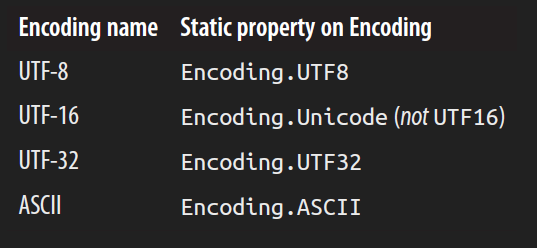

### Encoding to byte arrays

In [ ]:
byte[] utf8Bytes = System.Text.Encoding.UTF8.GetBytes ("0123456789");
byte[] utf16Bytes = System.Text.Encoding.Unicode.GetBytes ("0123456789");
byte[] utf32Bytes = System.Text.Encoding.UTF32.GetBytes ("0123456789");

Console.WriteLine (utf8Bytes.Length); // 10
Console.WriteLine (utf16Bytes.Length); // 20
Console.WriteLine (utf32Bytes.Length); // 40

string original1 = System.Text.Encoding.UTF8.GetString (utf8Bytes);
string original2 = System.Text.Encoding.Unicode.GetString (utf16Bytes);
string original3 = System.Text.Encoding.UTF32.GetString (utf32Bytes);

Console.WriteLine (original1); // 0123456789
Console.WriteLine (original2); // 0123456789
Console.WriteLine (original3); // 0123456789

### UTF-16 and surrogate pairs

<div dir="rtl" style="width:90%; margin:auto">
<p><strong>UTF-16</strong> یکی از طرح‌های رمزگذاری یونیکد است که برای نمایش کاراکترها از 16 بیت (2 بایت) استفاده می‌کند. UTF-16 برای نمایش کاراکترهای موجود در محدوده‌ی Basic Multilingual Plane (BMP) که شامل کدپوینت‌های از U+0000 تا U+FFFF است، از یک کد واحد 16 بیتی استفاده می‌کند. اما برای کاراکترهای خارج از این محدوده، از جفت‌های جانشین (surrogate pairs) استفاده می‌کند.</p>

<h3>جفت‌های جانشین (Surrogate Pairs) چیست؟</h3>
<p>جفت‌های جانشین یک مکانیزم در UTF-16 است که به کمک آن می‌توان کاراکترهای خارج از محدوده‌ی BMP (از U+10000 تا U+10FFFF) را نمایش داد. جفت‌های جانشین شامل دو واحد 16 بیتی (دو <code>char</code> در C#) هستند که با هم یک کدپوینت یونیکد خارج از BMP را نمایش می‌دهند.</p>

<h4>نحوه کار جفت‌های جانشین:</h4>
<ol><li><p><strong>High Surrogate (بخش بالایی جانشین)</strong>:</p><ul><li>این بخش شامل اولین واحد 16 بیتی است و در محدوده U+D800 تا U+DBFF قرار دارد.</li></ul></li><li><p><strong>Low Surrogate (بخش پایینی جانشین)</strong>:</p><ul><li>این بخش شامل دومین واحد 16 بیتی است و در محدوده U+DC00 تا U+DFFF قرار دارد.</li></ul></li></ol>
</div>

In [21]:
// کاراکتر خارج از BMP: 𝄞 (U+1D11E)
string musicalSymbol = "\uD834\uDD1E";
        
Console.WriteLine($"String: {musicalSymbol}"); // Output: 𝄞
Console.WriteLine($"Length: {musicalSymbol.Length}"); // Output: 2
        
 // بررسی جفت‌های جانشین
char highSurrogate = musicalSymbol[0];
char lowSurrogate = musicalSymbol[1];
        
Console.WriteLine($"High Surrogate: {highSurrogate} (U+{(int)highSurrogate:X4})"); // Output: High Surrogate: ? (U+D834)
Console.WriteLine($"Low Surrogate: {lowSurrogate} (U+{(int)lowSurrogate:X4})"); // Output: Low Surrogate: ? (U+DD1E)
        
 // تبدیل جفت جانشین به کدپوینت یونیکد
int codePoint = char.ConvertToUtf32(musicalSymbol, 0);
Console.WriteLine($"Code Point: U+{codePoint:X5}"); // Output: U+1D11E
    

String: 𝄞
Length: 2
High Surrogate: � (U+D834)
Low Surrogate: � (U+DD1E)
Code Point: U+1D11E


In [ ]:
//method for work with Surrogate
bool IsSurrogate (char c)
bool IsHighSurrogate (char c)
bool IsLowSurrogate (char c)
bool IsSurrogatePair (char highSurrogate, char lowSurrogate)